In [2]:
from helpers import *

In [3]:
from scipy.io import loadmat

# Đường dẫn tới file .mat
mat_path = r'D:\HUST\Semesters\2024.2\Vi xử lý\New_\bidmc-ppg-and-respiration-dataset-1.0.0\bidmc-ppg-and-respiration-dataset-1.0.0\bidmc_data.mat'
mat = loadmat(mat_path, squeeze_me=True, struct_as_record=True)

# Lấy biến 'data'
records = mat['data']  # dạng numpy array gồm 53 phần tử (1 bản ghi = 1 bệnh nhân)

# Matlab (r) Format
The *bidmc_data.mat* file contains the following subset of the dataset in a single Matlab (r) variable named *data*. The following are provided for each of the 53 recordings:
* *ekg*:   Lead II ECG signal. Each signal is provided in a structure, where the *v* field denotes the signal values, and *fs* is the sampling frequency.
* *ppg*:   Photoplethysmogram signal
* *ref.resp_sig.imp*:  Impedance respiratory signal
* *ref.breaths*:  Manual annotations of breaths provided by two independent annotators. A vector of sample numbers is provided, which correspond to the signal sample numbers.
* *ref.params*:  Physiological parameters: *rr* (respiratory rate, derived by the monitor from the impedance signal, breaths per minute), *hr* (heart rate, derived from the ECG, beats per minute), *pr* (pulse rate, derived from the PPG, beats per minute), *spo2* (blood oxygen saturation level, %).
* *fix*: A structure of fixed variables, including: *id* (the MIMIC II matched waveform database subject ID and recording identifier), *loc* (the ward location), and *source* (the URLs from which the original data were downloaded).


In [4]:
records[0].dtype.names

('fix', 'ppg', 'ekg', 'ref')

In [5]:
ppg_list = [record['ppg'] for record in records]

ppg_0 = ppg_list[0]

ppg_0['v'].item()

array([0.43597263, 0.43206256, 0.42815249, ..., 0.40175953, 0.40175953,
       0.40273705])

In [6]:
import pandas as pd

pd.Series(ppg_0['v'].item()).describe()

count    60001.000000
mean         0.465795
std          0.065512
min          0.223851
25%          0.410557
50%          0.446725
75%          0.509286
max          0.697947
dtype: float64

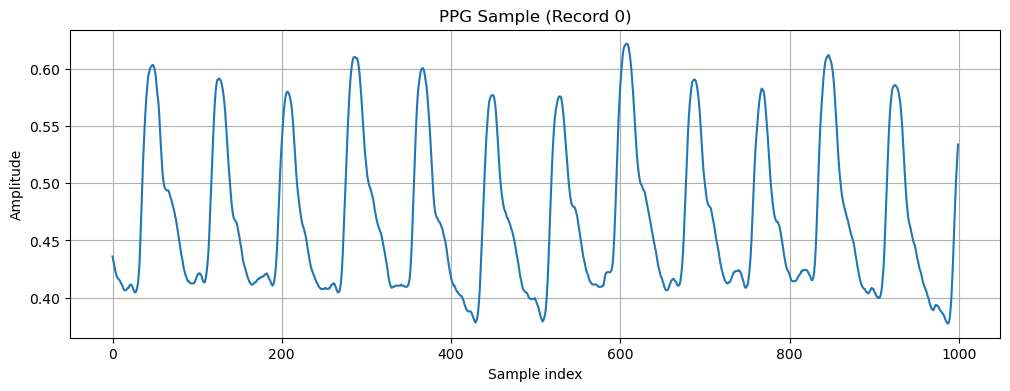

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(ppg_0['v'].item()[:1000])
plt.title(f"PPG Sample (Record 0)")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


# Correlation visualization

In [10]:
data_path = r'D:\HUST\Semesters\2024.2\Vi xử lý\New_\DATA\DATA'
person_name = 'duc' # 'duc' 'duong' 'dung'

In [11]:
df_duc_data = read_log_to_csv(
    data_path=data_path,
    person=person_name,
    color=None,
    date=None,
)

df_duc_data

,pcg,ppg_red,ppg_ir
0,1079,27193.0,25138.0
1,30,27341.0,25177.0
2,-1215,27293.0,25153.0
3,-2347,27127.0,25074.0
4,2944,27130.0,25073.0
...,...,...,...
1981,-503,27593.0,25725.0
1982,-1068,27744.0,25784.0
1983,471,27818.0,25828.0
1984,-1804,27877.0,25846.0


In [12]:
#duc_pcg = df_duc_data_time[['pcg', 'timestamp']].copy()
duc_ppg_red = df_duc_data['ppg_red'].copy()
duc_ppg_ir = df_duc_data['ppg_ir'].copy()

fs_ppg = 500

In [15]:
normalized_ppg_red = duc_ppg_red / np.max(duc_ppg_red)
normalized_ppg_ir = duc_ppg_ir / np.max(duc_ppg_ir)

print(pd.Series(normalized_ppg_red).describe())
print(pd.Series(normalized_ppg_ir).describe())

count    1985.000000
mean        0.890908
std         0.049516
min         0.791586
25%         0.847012
50%         0.892955
75%         0.926511
max         1.000000
Name: ppg_red, dtype: float64
count    1985.000000
mean        0.924208
std         0.038486
min         0.843078
25%         0.888133
50%         0.923744
75%         0.958068
max         1.000000
Name: ppg_ir, dtype: float64


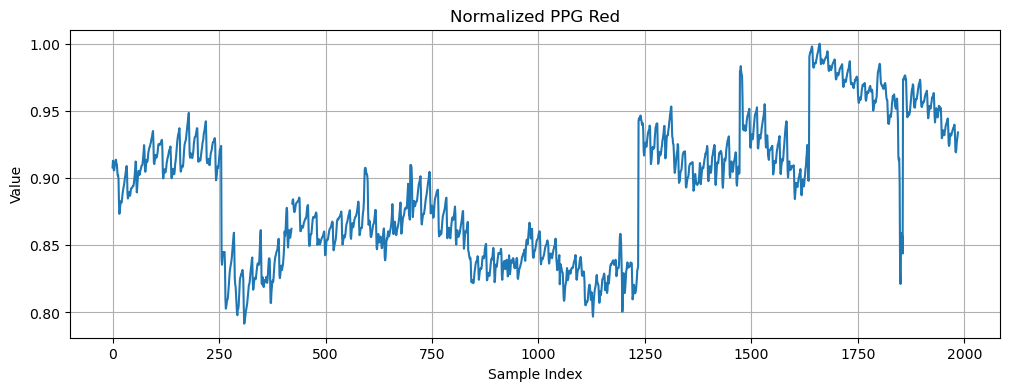

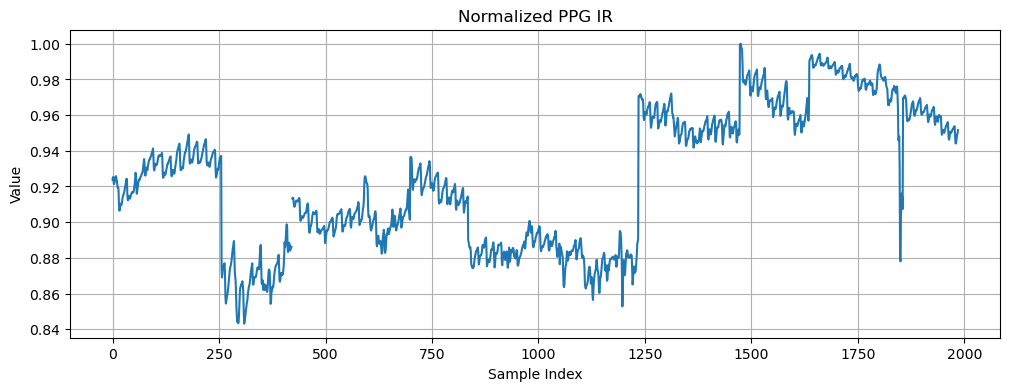

In [17]:
plot_signal(normalized_ppg_red, title = 'Normalized PPG Red')
plot_signal(normalized_ppg_ir, title = 'Normalized PPG IR')

In [22]:
print("Correlation between measured and ground truth PPG: ")
print(np.corrcoef(normalized_ppg_ir, ppg_0['v'].item()[:1986]))

Correlation between measured and ground truth PPG: 
[[nan nan]
 [nan  1.]]
